In [6]:
import data_analysis_funcs as daf
import matplotlib.pyplot as plt

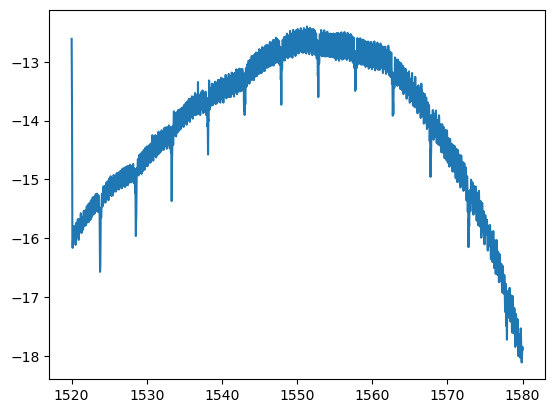

In [7]:
data_analyse_file="sg_rr_20_025 2023-12-13 17-59-26.csv"
wvlen_array,pow_array=daf.get_wavlen_and_pow_arrays(data_analyse_file)
daf.plot_visualise(wvlen_array,pow_array, full_range=True)

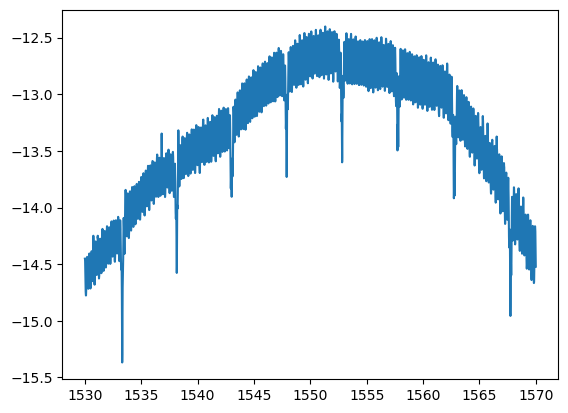

1530.0
1570.0


In [3]:
start_point_index=1000
end_point_index=5001
daf.plot_visualise(wvlen_array,pow_array,full_range=False,start_index=start_point_index,stop_index=end_point_index)
wvlen_peak_search=wvlen_array[start_point_index:end_point_index]
power_peak_search=pow_array[start_point_index:end_point_index]
print(wvlen_peak_search[0])
print(wvlen_peak_search[-1])

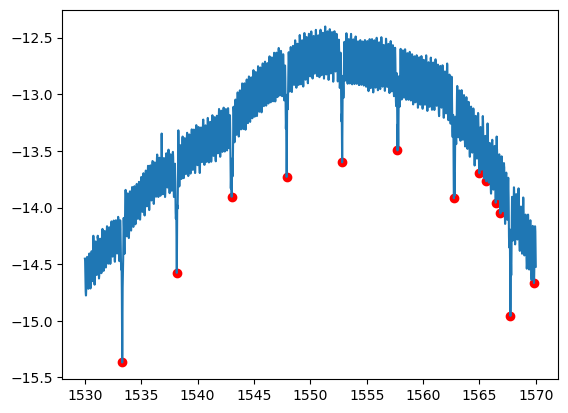

13
[1533.31, 1538.15, 1543.02, 1547.9, 1552.82, 1557.73, 1562.73, 1564.99, 1565.61, 1566.44, 1566.86, 1567.75, 1569.83]


In [8]:
wvlen_step_size=0.01
approx_fsr=5
promin_use=0.5
#dist_use=(approx_fsr/2)/wvlen_step_size
dist_use=1
peak_locs,n_peaks,peak_wavelens,peak_powers=daf.give_peak_locs(wvlen_step_size,approx_fsr,promin_use,dist_use,wvlen_peak_search,power_peak_search)
plt.plot(wvlen_peak_search,power_peak_search)
plt.scatter(peak_wavelens,peak_powers,color="red", marker="x")
plt.show()
print(n_peaks)#just added for sanity check
print(peak_wavelens)#sanity check

In [5]:
fsr_values=daf.calc_fsrs(peak_wavelens)
fsr_mean,fsr_error=daf.fsr_avg_and_error(fsr_values)
print(fsr_values)
print(fsr_mean)
print(fsr_error)

[4.84 4.87 4.88 4.92 4.91 5.   2.26 0.62 0.83 0.42 0.89 2.08]
3.0433333333333317
0.5813038288314866
